In [7]:
import cobra
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cobra.flux_analysis import variability

expression_data = pd.read_csv('e_coli_core_expression.csv', index_col=0)
expression_data.sort_values(by=' reaction activity [mmol/gDW/h] ', ascending=False, inplace=True)
# expression_data

In [8]:
model = cobra.io.load_json_model('e_coli_core.json')
# model

Observations:
1. There are 95 reactions but only 73 have data!

# Excercise 1

No code required so answer is in the README.md

# Excercise 2

In [9]:
reactionsWithData = set(expression_data.index) # List of reactions with expression data from csv
reactionsInModel = set([reaction.id for reaction in model.reactions]) # List of reactions in the model
reactionsWithoutData = reactionsInModel - reactionsWithData # Set difference to find reactions without data
print(f"Number of reactions in the model: {len(reactionsInModel)}")
print(f"Number of reactions with expression data: {len(reactionsWithData)}")
print(f"Number of reactions without expression data: {len(reactionsWithoutData)}")
print(f"Reactions with expression data: {reactionsWithData}")
print(f"Reactions in the model but not in expression data: {reactionsWithoutData}")

Number of reactions in the model: 95
Number of reactions with expression data: 73
Number of reactions without expression data: 22
Reactions with expression data: {'FUM', 'FBP', 'ICDHyr', 'PDH', 'GLCpts', 'ICL', 'MDH', 'TPI', 'GAPD', 'ACALDt', 'LDH_D', 'ACONTa', 'SUCOAS', 'PIt2r', 'FUMt2_2', 'PFL', 'MALt2_2', 'PPS', 'ENO', 'ACt2r', 'NADH16', 'GLUSy', 'CS', 'NH4t', 'GLUN', 'D_LACt2', 'NADTRHD', 'ME2', 'PGI', 'CYTBD', 'FBA', 'CO2t', 'AKGDH', 'FRUpts2', 'SUCCt3', 'SUCDi', 'PTAr', 'THD2', 'MALS', 'RPE', 'GND', 'RPI', 'ADK1', 'ACONTb', 'PGM', 'TALA', 'GLUt2r', 'TKT1', 'PGK', 'PPCK', 'FORt2', 'GLUDy', 'GLNS', 'O2t', 'AKGt2r', 'PFK', 'TKT2', 'PPC', 'ALCD2x', 'FRD7', 'FORt', 'PYRt2', 'ME1', 'PGL', 'SUCCt2_2', 'G6PDH2r', 'ETOHt2r', 'ACALD', 'ACKr', 'H2Ot', 'ATPS4r', 'GLNabc', 'PYK'}
Reactions in the model but not in expression data: {'EX_nh4_e', 'EX_acald_e', 'EX_co2_e', 'EX_o2_e', 'EX_etoh_e', 'EX_lac__D_e', 'EX_pi_e', 'EX_fru_e', 'EX_succ_e', 'EX_pyr_e', 'EX_h2o_e', 'BIOMASS_Ecoli_core_w_GAM',

In [10]:
# Create a dictionary to map reaction IDs to their expression values
expression_dict = expression_data[' reaction activity [mmol/gDW/h] '].to_dict()

# reversible & irreversible reactions among the reactions with data
reversible_reactions = [reaction for reaction in model.reactions if reaction.id in expression_dict and reaction.reversibility]
irreversible_reactions = [reaction for reaction in model.reactions if reaction.id in expression_dict and not reaction.reversibility]
len(reversible_reactions), len(irreversible_reactions)

# NOTICE THAT GLUCOSE EXCHANGE & ATPM ARE NOT IN THE EXPRESSION DATA!!! Also the lengths of lists match the expected values :D

(39, 34)

In [11]:
# 1. For reversible reactions with expression data, set lower and upper bounds to -value and +value usinf expression_dict!
for reaction in reversible_reactions:
    value = expression_dict[reaction.id]
    reaction.lower_bound = -value
    reaction.upper_bound = value
    

# 2. For irreversible reactions with expression data, set lower and upper bounds to 0 and value or -value and 0 depending on the original bounds
# (THIS IS TRICKY BECAUSE THE DIRECTIONS ARE NOT CONSISTENT)
for reaction in irreversible_reactions:
    value = expression_dict[reaction.id]
    if reaction.upper_bound > 0:
        reaction.upper_bound = value
    elif reaction.lower_bound < 0:
        reaction.lower_bound = -value
        
# 3. For reactions without data, leave bounds as is. No change required since its in the NO DATA REACTIONS list

# 4. For glucose exchange reaction, set bounds to -1000 and 1000
glucose_exchange = model.reactions.get_by_id('EX_glc__D_e')
glucose_exchange.lower_bound = -1000
glucose_exchange.upper_bound = 1000

# 5. For ATPM reaction, leave bounds as is. No change required since its in the NO DATA REACTIONS list

In [12]:
# print a table listing each reaction’s lower and upper flux bound after implementing the above
for reaction in model.reactions:
    print(f"{reaction.id}: Lower Bound = {reaction.lower_bound}, Upper Bound = {reaction.upper_bound}")

PFK: Lower Bound = 0.0, Upper Bound = 12.12
PFL: Lower Bound = 0.0, Upper Bound = 1.0
PGI: Lower Bound = -13.12, Upper Bound = 13.12
PGK: Lower Bound = -23.13, Upper Bound = 23.13
PGL: Lower Bound = 0.0, Upper Bound = 8.12
ACALD: Lower Bound = -1.16, Upper Bound = 1.16
AKGt2r: Lower Bound = -3.1, Upper Bound = 3.1
PGM: Lower Bound = -20.01, Upper Bound = 20.01
PIt2r: Lower Bound = -6.03, Upper Bound = 6.03
ALCD2x: Lower Bound = -9.01, Upper Bound = 9.01
ACALDt: Lower Bound = -2.29, Upper Bound = 2.29
ACKr: Lower Bound = -1.19, Upper Bound = 1.19
PPC: Lower Bound = 0.0, Upper Bound = 2.56
ACONTa: Lower Bound = -25.35, Upper Bound = 25.35
ACONTb: Lower Bound = -25.35, Upper Bound = 25.35
ATPM: Lower Bound = 8.39, Upper Bound = 1000.0
PPCK: Lower Bound = 0.0, Upper Bound = 25.23
ACt2r: Lower Bound = -3.23, Upper Bound = 3.23
PPS: Lower Bound = 0.0, Upper Bound = 2.5
ADK1: Lower Bound = -30.57, Upper Bound = 30.57
AKGDH: Lower Bound = 0.0, Upper Bound = 24.35
ATPS4r: Lower Bound = -60.5, U

# Excercise 3

In [13]:
# compute FVA for all reactions 

fva = variability.flux_variability_analysis(
    model=model,
    reaction_list=model.reactions,
    loopless=False,
    fraction_of_optimum=0.0 # we do not impose any minimum growth level
)

# print a table with the reaction id and the corresponding min and max flux
print ("FVA minimal and maximal fluxes")
print(fva)

FVA minimal and maximal fluxes
           minimum    maximum
PFK       0.334677  11.153556
PFL       0.000000   1.000000
PGI      -0.085323   9.020351
PGK     -17.596002  -0.879355
PGL       0.000000   4.522388
...            ...        ...
NADH16    1.831111  20.260000
NADTRHD   0.000000   1.260000
NH4t      0.000000   3.450000
O2t       0.500000  12.256000
PDH       0.000000  10.931107

[95 rows x 2 columns]


In [14]:
# identify reactions with expression imposed maximum bounds whose feasible FVA maximum flux is smaller than the imposed upper bound

restricted_reactions = []

for reaction in model.reactions:
    if reaction.id in expression_dict:
        if reaction.id == "FORt":
            continue
     # only consider reactions where we imposed bounds from expression data
    if reaction.id in expression_dict:
        # the bound we set in Exercise 2
        max_bound = reaction.upper_bound
        max_fva = fva.loc[reaction.id, "maximum"]
        # FVA finds a positive flux, but smaller than the imposed bound
        if (max_fva > 0) and (max_fva < max_bound):
            restricted_reactions.append(reaction.id)

print("Number of reactions with max FVA flux < upper bound:", len(restricted_reactions))
print("List of these reactions:", restricted_reactions)

Number of reactions with max FVA flux < upper bound: 36
List of these reactions: ['PFK', 'PGI', 'PGL', 'PIt2r', 'ACONTa', 'ACONTb', 'PPCK', 'ADK1', 'AKGDH', 'ATPS4r', 'PTAr', 'PYK', 'CO2t', 'RPE', 'CS', 'CYTBD', 'ENO', 'SUCDi', 'TALA', 'TKT1', 'TKT2', 'TPI', 'FBA', 'FUM', 'G6PDH2r', 'GAPD', 'GLCpts', 'GLUDy', 'GLUN', 'GLUSy', 'GND', 'ICDHyr', 'ICL', 'MALS', 'O2t', 'PDH']


In [15]:
# number of reactions that have a positive minimal flux 

# if the minimum value in FVA is >0 this reaction always carry flux in forward direction
positive_minimal_flux = fva[fva["minimum"] > 0]

print("Number of reactions with positive minimal flux:", len(positive_minimal_flux))
print("List of these reactions:", list(positive_minimal_flux.index))

Number of reactions with positive minimal flux: 16
List of these reactions: ['PFK', 'ATPM', 'ATPS4r', 'PTAr', 'CS', 'CYTBD', 'ENO', 'TPI', 'EX_h_e', 'EX_h2o_e', 'FBA', 'GAPD', 'GLCpts', 'ICDHyr', 'NADH16', 'O2t']


# Excercise 4

In [18]:
solution = model.optimize()
print("Maximal biomass production rate:", solution.objective_value)

Maximal biomass production rate: 0.48470309797054517


In [22]:
bottlenecks = []
for reaction in model.reactions:
    flux = solution.fluxes[reaction.id]
    if abs(flux - reaction.upper_bound) < 1e-6 or abs(flux - reaction.lower_bound) < 1e-6:
        bottlenecks.append((reaction.id, flux, reaction.lower_bound, reaction.upper_bound))

print("Reactions that reached bottleneck:")
for bottleneck in bottlenecks:
    print(bottleneck)

Reactions that reached bottleneck:
('PFL', np.float64(1.0), 0.0, 1.0)
('ACALD', np.float64(-1.16), -1.16, 1.16)
('ACKr', np.float64(-1.19), -1.19, 1.19)
('ATPM', np.float64(8.39), 8.39, 1000.0)
('PPCK', np.float64(0.0), 0.0, 25.23)
('PPS', np.float64(0.0), 0.0, 2.5)
('PYRt2', np.float64(-1.26), -1.26, 1.26)
('SUCCt2_2', np.float64(0.0), 0.0, 2.36)
('SUCCt3', np.float64(0.0), 0.0, 6.67)
('THD2', np.float64(4.5), 0.0, 4.5)
('EX_acald_e', np.float64(0.0), 0.0, 1000.0)
('EX_akg_e', np.float64(0.0), 0.0, 1000.0)
('EX_fru_e', np.float64(0.0), 0.0, 1000.0)
('EX_fum_e', np.float64(0.0), 0.0, 1000.0)
('EX_gln__L_e', np.float64(0.0), 0.0, 1000.0)
('EX_glu__L_e', np.float64(0.0), 0.0, 1000.0)
('EX_mal__L_e', np.float64(0.0), 0.0, 1000.0)
('EX_succ_e', np.float64(0.0), 0.0, 1000.0)
('FBP', np.float64(0.0), 0.0, 2.35)
('FORt2', np.float64(0.0), 0.0, 1.28)
('FRD7', np.float64(0.0), 0.0, 20.07)
('FRUpts2', np.float64(0.0), 0.0, 10.08)
('FUMt2_2', np.float64(0.0), 0.0, 2.45)
('GLNabc', np.float64(0.0)

In [23]:
for reaction in model.reactions:
    flux = solution.fluxes[reaction.id]
    if abs(flux) < 1e-9 and reaction.upper_bound < 1000:
        print(reaction.id, "Flux:", flux, "Bounds:", (reaction.lower_bound, reaction.upper_bound))

AKGt2r Flux: 0.0 Bounds: (-3.1, 3.1)
ACALDt Flux: 0.0 Bounds: (-2.29, 2.29)
PPCK Flux: 0.0 Bounds: (0.0, 25.23)
PPS Flux: 0.0 Bounds: (0.0, 2.5)
ADK1 Flux: 0.0 Bounds: (-30.57, 30.57)
SUCCt2_2 Flux: 0.0 Bounds: (0.0, 2.36)
SUCCt3 Flux: 0.0 Bounds: (0.0, 6.67)
FBP Flux: 0.0 Bounds: (0.0, 2.35)
FORt2 Flux: 0.0 Bounds: (0.0, 1.28)
FRD7 Flux: 0.0 Bounds: (0.0, 20.07)
FRUpts2 Flux: 0.0 Bounds: (0.0, 10.08)
FUMt2_2 Flux: 0.0 Bounds: (0.0, 2.45)
GLNabc Flux: 0.0 Bounds: (0.0, 0.25)
GLUN Flux: 0.0 Bounds: (0.0, 6.25)
GLUSy Flux: 0.0 Bounds: (0.0, 7.35)
GLUt2r Flux: 0.0 Bounds: (-4.12, 4.12)
ICL Flux: 0.0 Bounds: (0.0, 14.07)
MALS Flux: 0.0 Bounds: (0.0, 9.12)
MALt2_2 Flux: 0.0 Bounds: (0.0, 8.87)
ME1 Flux: 0.0 Bounds: (0.0, 3.24)
ME2 Flux: 0.0 Bounds: (0.0, 3.34)
NADTRHD Flux: 0.0 Bounds: (0.0, 1.26)


Answer for 4c: The reaction AKGt2r, bounds: –3.1 to 3.1, carries no flux in the optimal biomass solution. This is because it is not part of the biomass-maximizing pathway under the given constraints. Instead, the network routes flux through AKGHD. Thus, although AKGt2r could carry flux, the system achieves maximal biomass without utilizing it.
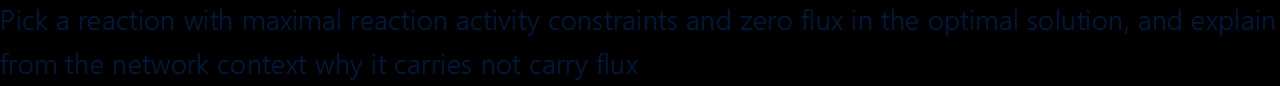